In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch
import numpy as np
from utils import *
from icecream import ic
from models.RBSimCLR import *
from matplotlib import pyplot as plt

In [3]:
num=31
path = f"./checkpoint/RBSimCLR_epoch_{num}_checkpoint.pt"
ic(path)
ckpt = torch.load(path, map_location=torch.device('cpu'))

ic| path: './checkpoint/RBSimCLR_epoch_31_checkpoint.pt'


In [4]:
tri_bsz, val_bsz = ckpt['bsz']
model_state = ckpt['model_state_dict']
optimizer_state = ckpt['optimizer_state_dict']
scheduler_state = ckpt['scheduler_state_dict']
logger = ckpt['logger']

In [8]:
model = RBSimCLR(256)
model.load_state_dict(model_state)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [9]:
model.encoder

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
logger.val_loss_epoch

In [14]:
tri_bsz, val_bsz

(128, 64)

In [12]:
logger.attack

[4, 0, 3, 3, 3, 1]

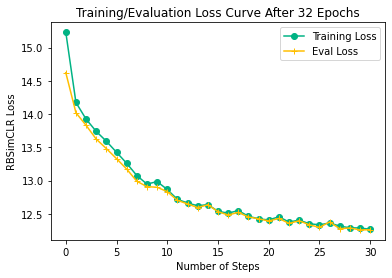

In [15]:
def plot_loss(logger):

    # n_steps = len(logger.tr_loss_steps)
    # plt.plot(np.arange(n_steps), logger.tr_loss_steps, color='#00b384')
    n_steps = len(logger.tr_loss_epoch)
    plt.plot(np.arange(n_steps), logger.tr_loss_epoch, marker='o', label='Training Loss', color='#00b384')
    plt.plot(np.arange(n_steps), logger.val_loss_epoch, marker='+', label = 'Eval Loss', color='#ffbf00')
    plt.title("Training/Evaluation Loss Curve After 32 Epochs")
    plt.legend()
    plt.xlabel("Number of Steps")
    plt.ylabel("RBSimCLR Loss")

    return plt
plot = plot_loss(logger)